In [1]:
from pinn import PINN
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU, Dense, Input

In [14]:
class RoesslerPINN(PINN):
    def __init__(self, x0, a, b, c, layers=None, name=None):
        super(RoesslerPINN, self).__init__(x0, lambda t, x: self.roessler(x, a, b, c), layers=layers, name=name)

    def roessler(self, x, a, b, c):
        dx = -x[:,1] -   x[:,2]
        dy =  x[:,0] + a*x[:,1]
        dz = b + x[:,2]*(x[:,0] - c)
        return tf.stack([dx, dy, dz], 1)
    
    def roessler_ode(self, t, x, a, b, c):
        dx = -x[1] - x[2]
        dy = x[0] + a*x[1]
        dz = b + x[2]*(x[0] - c)
        return [dx, dy, dz]

    def plot(self, t):
        sol = solve_ivp(self.roessler_ode, y0=[0.1,0.2,0.3], t_span=(0,200), max_step=0.01, args=(0.1,0.1,14.0), method='RK45')

        y = model(t).numpy()
        fig = plt.figure(figsize=[10, 10])
        ax = fig.gca(projection='3d')
        l1, = ax.plot(sol.y[0],sol.y[1],sol.y[2])
        l1.set_label("RK45")
        l2, = ax.plot(y[:,0], y[:,1], y[:,2])
        l2.set_label("NN")
        ax.legend()

In [15]:
model = RoesslerPINN([0.1,0.2,0.3], 0.1, 0.1, 14.0)
model.add(Dense(1))
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(512, activation="tanh"))
model.add(Dense(128, activation="tanh"))
model.add(Dense(3))

In [17]:
t = tf.constant(np.linspace(0,200,10000), shape=(10000,1), dtype=tf.float32)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0000001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss="mse")
model.fit(t, epochs=200, batch_size=10000)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2698074.0000
Epoch 2/200
1/1 [==============================] - 1s 668ms/step - loss: 2634899.7500
Epoch 3/200
1/1 [==============================] - 1s 674ms/step - loss: 2572517.5000
Epoch 4/200
1/1 [==============================] - 1s 651ms/step - loss: 2510927.0000
Epoch 5/200
1/1 [==============================] - 1s 632ms/step - loss: 2450207.0000
Epoch 6/200
1/1 [==============================] - 1s 682ms/step - loss: 2390335.0000
Epoch 7/200
1/1 [==============================] - 1s 682ms/step - loss: 2331462.5000
Epoch 8/200
1/1 [==============================] - 1s 651ms/step - loss: 2273450.2500
Epoch 9/200
1/1 [==============================] - 1s 647ms/step - loss: 2216231.2500
Epoch 10/200
1/1 [==============================] - 1s 669ms/step - loss: 2159886.7500
Epoch 11/200
1/1 [==============================] - 1s 643ms/step - loss: 2104660.5000
Epoch 12/200
1/1 [==============================] - 1s 

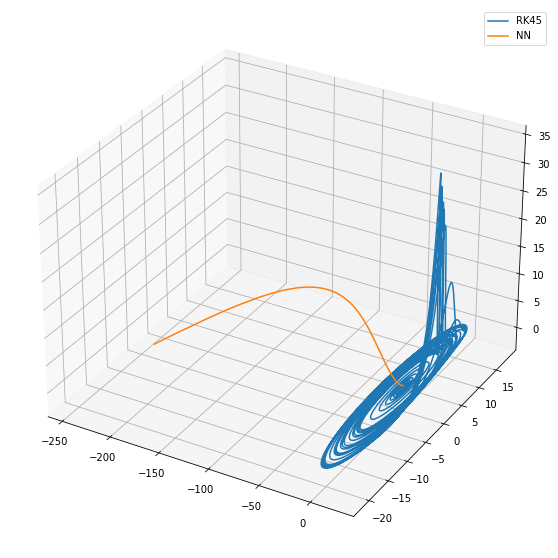

In [18]:
model.plot(t)